In [1]:
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

%cd ../../../mini-ramses/utils/py/

from miniramses import regular_mesh

%cd ../../

/home/jp7427/.conda/envs/fvhoe-env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/jp7427/Desktop/mini-ramses/utils/py
/home/jp7427/Desktop/mini-ramses


/home/jp7427/.conda/envs/fvhoe-env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
solver = EulerSolver()
snapshot_dir = "/scratch/gpfs/jp7427/fvhoe/snapshots/"
solver.rkorder(
    1, snapshot_dir=snapshot_dir + "sedov3d_t=0.7_N=32_p=1_rs='hllc'_lc={'NAD': 1e-05}"
)

Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/sedov3d_t=0.7_N=32_p=1_rs='hllc'_lc={'NAD': 1e-05}


t=0.7, x=[0.015625, 0.984375], y=[0.015625, 0.984375], z=0.015625
horizontal_axis='x', vertical_axis='y'


Text(0.5, 0, '$x$')

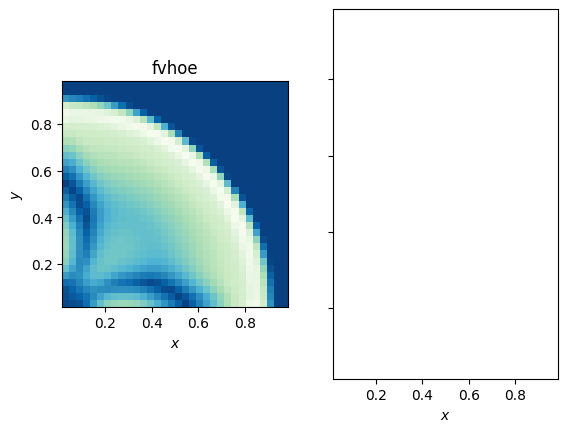

In [3]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

indexing = dict(z=0, t=1)

# velocity magnitude
solver.plot_2d_slice(ax[0], param="v", verbose=True, **indexing)
ax[0].set_title("fvhoe")
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")
ax[1].set_xlabel(r"$x$")

In [4]:
rd = regular_mesh(2)

vx, vy, vz = rd.u[1], rd.u[2], rd.u[3]
v = np.sqrt(np.square(vx) + np.square(vy) + np.square(vz))

ncpu=1 ndim=3 nlevelmax=6
Time= 0.700465480193077
Reading grid data...
ncpu=1 ndim=3 nlevelmax=6 nvar=5
Reading hydro data...
Found 262144 leaf cells
Extracting leaf cells...


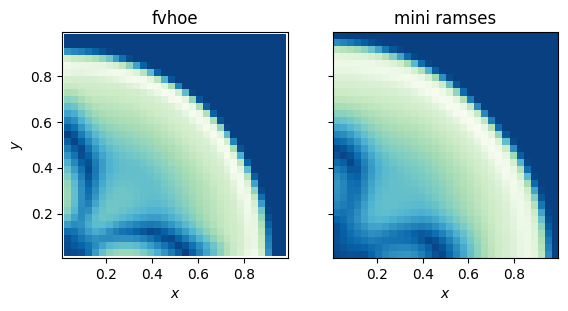

In [5]:
slice3d = (slice(32, None), slice(32, None), 32)

extent = (
    0.5 * rd.x[0].min(),
    0.5 * rd.x[0].max(),
    0.5 * rd.x[1].min(),
    0.5 * rd.x[1].max(),
)

ax[1].imshow(np.rot90(v[slice3d], 1), extent=extent, cmap="GnBu_r")
ax[1].set_xlim(extent[0], extent[1])
ax[1].set_ylim(extent[2], extent[3])
ax[1].set_title("mini ramses")
fig